# ensemble learning

## steps of bagging
- import libraries
- fit classifier (module)
- check accuracy
- compare all outputs or predictions 

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [202]:
# loading Data set
df = sns.load_dataset('iris')

In [203]:
# applying label emcoding on labels(target) columns
encoder = LabelEncoder()
df.species = encoder.fit_transform(df['species']) 

In [204]:
# dropping first column
df.species.unique()

array([0, 1, 2])

In [215]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [206]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [207]:
# applying label emcoding on labels(target) columns
encoder = LabelEncoder()
df.species = encoder.fit_transform(df['species']) 

In [208]:
df.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [211]:
#Since we have three class in labels, we are dropping one to make it binary classes
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [212]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


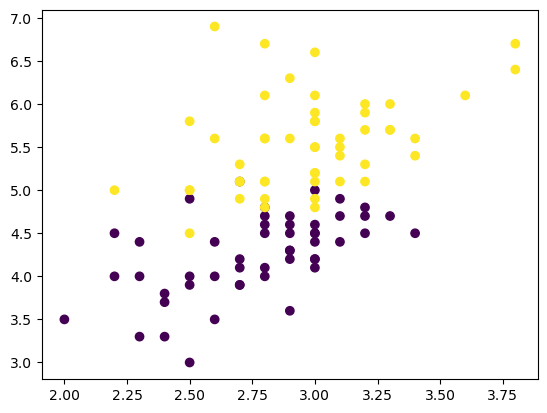

In [213]:
# plotting sepal widht and petal length 
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap=None)#yellow and purple for 1,2 
#cmap is for environment it could be warm summer winter it effect the colour of plot

In [140]:
# shuffing data 
df = df.sample(100)

In [141]:
# considering first 60 records are trainnig data 
df_train = df.iloc[:60,:].sample(10)

# considering next 20 record after 60  are validation
df_val = df.iloc[60:80,:].sample(5)

# considering next 20 record after 60  are testing data
df_test = df.iloc[80:,:].sample(5)

In [142]:
# validation data and labels from validation data 
X_val = df_val.iloc[:,0:2].values
y_val= df_val.iloc[:,-1].values

In [143]:
# train data labels from trian data 
X_train = df_train.iloc[:,0:2].values
y_train = df_train.iloc[:,-1].values

In [144]:
# test data and labels from test data 
X_test = df_test.iloc[:,0:2].values
y_test = df_test.iloc[:,-1].values

# Case 1 - Bagging

!pip install mlxtend #downloading 

In [145]:
# our model that predicts plot and shows accuracy 
def evaluate(clf,X,y):
    clf.fit(X,y)      #fitting classifier clf=Classifier
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=3) #legend 2 we have 1,2 species
    y_pred = clf.predict(X_val)
    print(accuracy_score(y_val,y_pred))
    

In [146]:
# Data for Tree 1 
# since we need to do shuffling every time for random selection of records in every tree

df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag 

,sepal_width,petal_length,petal_width,species
94,2.7,4.2,1.3,1
55,2.8,4.5,1.3,1
66,3.0,4.5,1.5,1
140,3.1,5.6,2.4,2
149,3.0,5.1,1.8,2
94,2.7,4.2,1.3,1
148,3.4,5.4,2.3,2
107,2.9,6.3,1.8,2


In [147]:
# Creating our classifier
dt_bag1 = DecisionTreeClassifier()

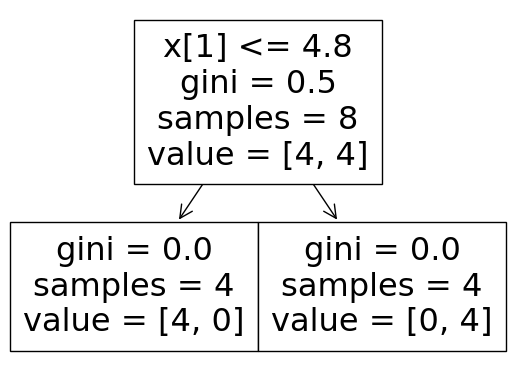

0.4


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


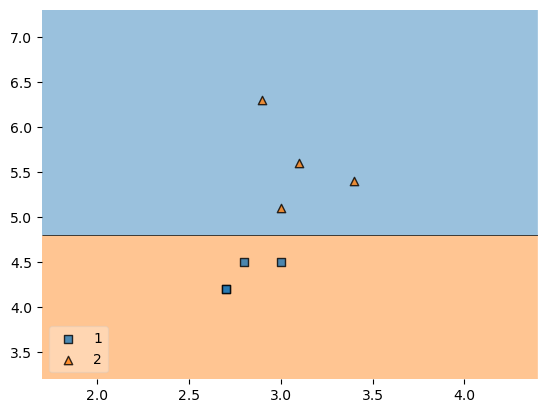

In [148]:
# runninig our model 
evaluate(dt_bag1,X,y)

In [149]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag 

,sepal_width,petal_length,petal_width,species
148,3.4,5.4,2.3,2
114,2.8,5.1,2.4,2
107,2.9,6.3,1.8,2
148,3.4,5.4,2.3,2
66,3.0,4.5,1.5,1
66,3.0,4.5,1.5,1
94,2.7,4.2,1.3,1
2,3.2,1.3,0.2,0


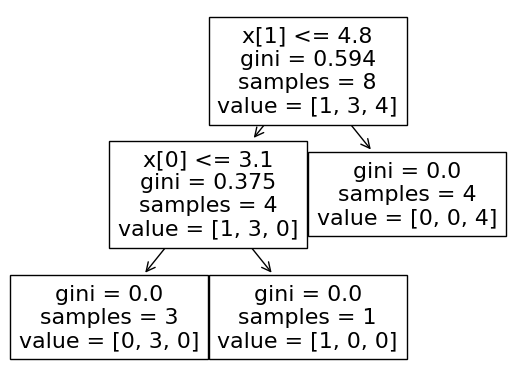

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


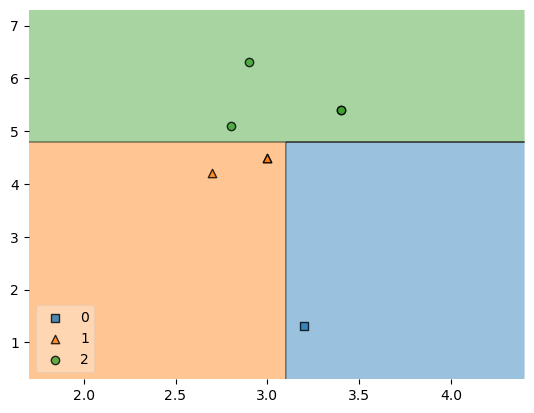

In [150]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [165]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]
df_bag 

,sepal_width,petal_length,petal_width,species
148,3.4,5.4,2.3,2
94,2.7,4.2,1.3,1
66,3.0,4.5,1.5,1
148,3.4,5.4,2.3,2
107,2.9,6.3,1.8,2
2,3.2,1.3,0.2,0
114,2.8,5.1,2.4,2
66,3.0,4.5,1.5,1


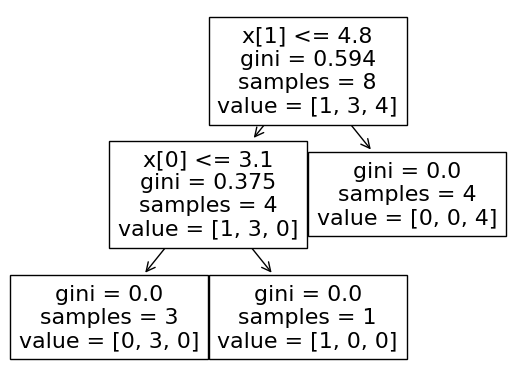

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


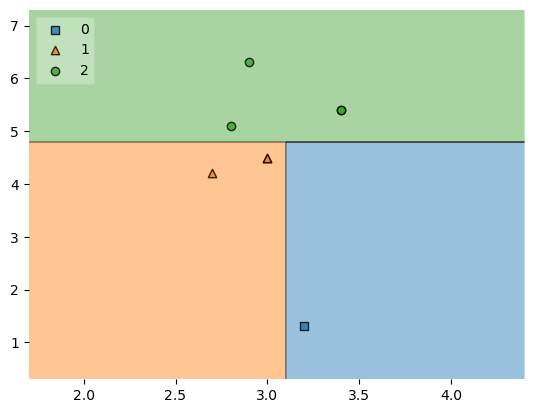

In [166]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [160]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [161]:
df_test

,sepal_width,petal_length,petal_width,species
110,3.2,5.1,2.0,2
135,3.0,6.1,2.3,2
56,3.3,4.7,1.6,1
73,2.8,4.7,1.2,1
126,2.8,4.8,1.8,2


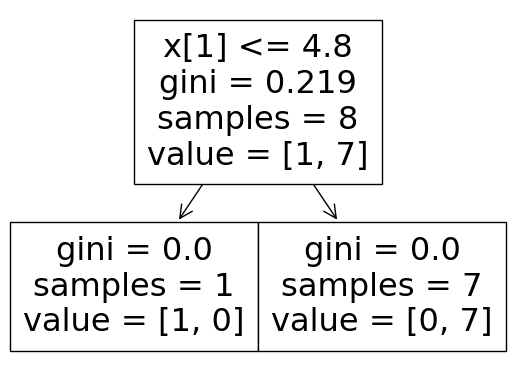

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


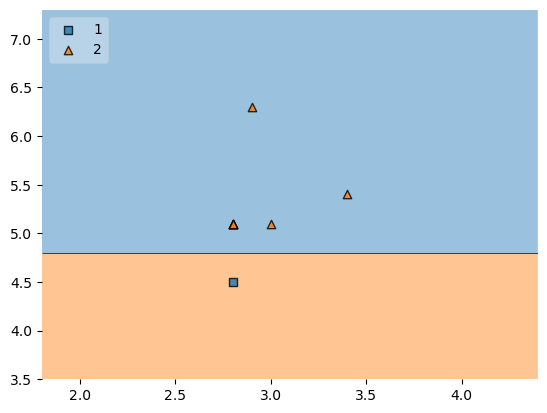

In [162]:
newclf = DecisionTreeClassifier()
evaluate(newclf,X,y)


In [163]:
import numpy as np

In [164]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.0]).reshape(1,2)))#chaecking output of all three 
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Different sampling techniques can be used to sampling data 

### Pasting

In [125]:
# Method 1
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
112,3.0,5.5,2
97,2.9,4.3,1
114,2.8,5.1,2
115,3.2,5.3,2
53,2.3,4.0,1
50,3.2,4.7,1
128,2.8,5.6,2
87,2.3,4.4,1
62,2.2,4.0,1
95,3.0,4.2,1


In [126]:
df_train.sample(8)

,sepal_width,petal_length,species
115,3.2,5.3,2
97,2.9,4.3,1
112,3.0,5.5,2
62,2.2,4.0,1
114,2.8,5.1,2
95,3.0,4.2,1
87,2.3,4.4,1
128,2.8,5.6,2


### Random Subspaces

In [127]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [128]:
df1.sample(2,replace=True,axis=1)

,sepal_width,petal_length
136,3.4,5.6
26,3.4,1.6
28,3.4,1.4
125,3.2,6.0
56,3.3,4.7
25,3.0,1.6
80,2.4,3.8
122,2.8,6.7
107,2.9,6.3
89,2.5,4.0


### Random Patches
- column sampling

In [129]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_width,sepal_length
28,0.2,5.2
136,2.4,6.3
89,1.3,5.5
125,1.8,7.2
56,1.6,6.3
125,1.8,7.2
25,0.2,5.0
122,2.0,7.7
